In [760]:
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import matplotlib.mlab as mlab
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


### Sample

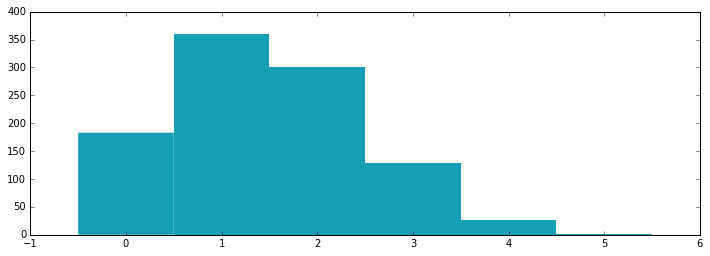

In [761]:
B_n = 5
B_p = 0.3
SampleSize = 1000
X1 = st.binom.rvs(B_n, B_p, loc=0, size=SampleSize, random_state=None)
mn = min(X1); mx = max(X1)
Rg = np.arange(start=mn, stop=mx+1, step=1)
Rt = np.arange(start=-1, stop=B_n+1, step=1)

pylab.rcParams['figure.figsize'] = (12, 4)
H = plt.hist(X1, bins=Rt+0.5, normed=False, 
         histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=1.0,
        color='#179FB6', edgecolor='none')
plt.show()

### Model

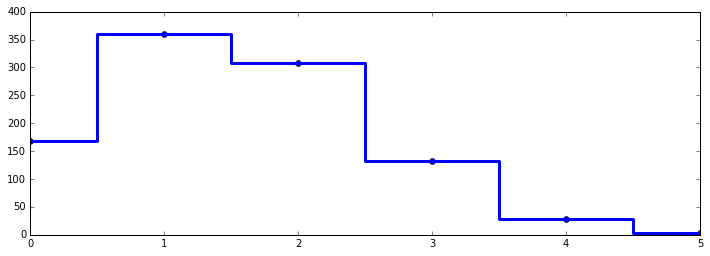

In [762]:
M_n = B_n
M_p = 0.3

i = np.arange(start=0, stop=M_n+1, step=1)

M = st.binom.pmf(i, M_n, M_p)
M = M*SampleSize

pylab.rcParams['figure.figsize'] = (12, 4)
plt.step(i, M, linewidth=3, marker='o',where='mid')
plt.show()

### Comparar

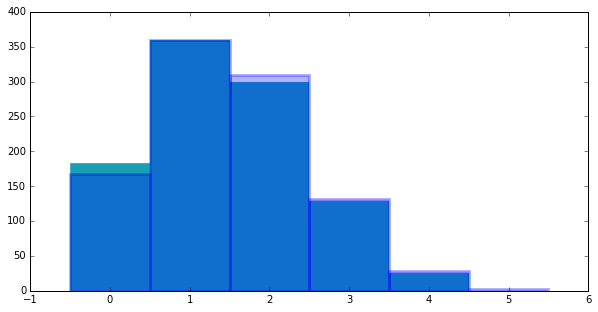

In [763]:
pylab.rcParams['figure.figsize'] = (10, 5)
plt.hist(X1, bins=Rg-0.5, normed=False, 
         histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=1.0,
        color='#179FB6', edgecolor='none', hold=True)
#plt.plot(Rg, M)
plt.bar(i-0.5, M, width=1.0, color='blue', alpha=0.3,edgecolor='blue', linewidth=3)
#plt.step(i, M, linewidth=3, where='mid', color='red')
#res=H[0]-M
#plt.plot(Rg-0.5, res)
plt.show()

### Test de chi cuadrado

In [764]:
N = len(H[0])
chi2 = 0
for i in range(N):
    chi2 = chi2 + (H[0][i]-M[i])**2 / M[i]    
print(chi2)

1.92471488829


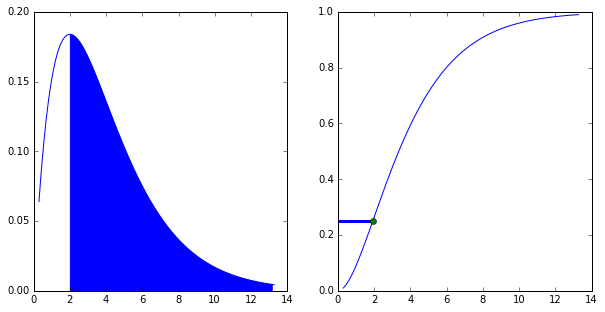

In [765]:
df = B_n - 1
r = np.linspace(st.chi2.ppf(0.01, df), st.chi2.ppf(0.99, df), 100)
Ji = st.chi2.pdf(r, df=df)

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
ax.plot(r, Ji)
lb = chi2; ub = max(r)
idx = np.searchsorted(r,[lb,ub])
sx = r[idx[0]:idx[1]]
sd = Ji[idx[0]:idx[1]]
plt.fill_between(sx, sd, 0, color = 'b')

ax = fig.add_subplot(1, 2, 2)
Jiac = st.chi2.cdf(r, df=df)
p = st.chi2.cdf(chi2, df=df)
fig = plt.figure()
ax.plot(r, Jiac)
ax.plot([0,chi2],[p, p], color='blue', linewidth=3)
ax.plot(chi2, p, marker='o')

plt.show()

In [766]:
# p-value
print st.chi2.cdf(1000, df=df) - st.chi2.cdf(chi2, df=df)

0.749603472171


### Ahora calculemos el p-value muchas veces para distintas muestras

In [807]:
# Para los datos hacemos un nuevo sorteo: H
B_n = 5
B_p = 0.3
SampleSize = 100

# El modelo es el mismo: M
M_n = B_n
M_p = 0.3
i = np.arange(start=0, stop=M_n+1, step=1)
M = st.binom.pmf(i, M_n, M_p)
M = M*SampleSize

# Experimento:
Nexperiments = 2000
pvals = []
chisq = []
df = B_n

In [808]:
for _ in range(Nexperiments):

    X1 = st.binom.rvs(B_n, B_p, loc=0, size=SampleSize, random_state=None)
    r = np.arange(0, B_n+2)
    H = np.histogram(X1, bins=r)

    chi2 = 0
    for i in range(B_n+1):
        chi2 = chi2 + (H[0][i]-M[i])**2 / M[i]    
    chisq.append(chi2)
    pval = st.chi2.cdf(1000, df=df) - st.chi2.cdf(chi2, df=df)
    pvals.append(pval)

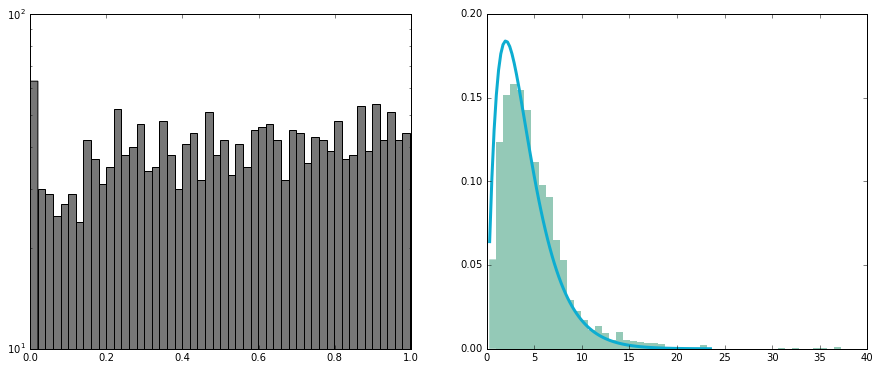

In [809]:
pylab.rcParams['figure.figsize'] = (15, 6)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.hist(pvals, 50, color='#777777')
ax.set_yscale("log", nonposy='clip')


ax = fig.add_subplot(1, 2, 2)
df = B_n - 1
r = np.linspace(st.chi2.ppf(0.01, df), st.chi2.ppf(0.9999, df), 100)
Ji = st.chi2.pdf(r, df=df)
ax.plot(r, Ji, color='#0DADD1', linewidth=3)
ax.hist(chisq, 50, normed=True, color='#94C9B7', edgecolor='none')

plt.show()

In [811]:
# porcentaje de veces que rechazamos la H0:
100.*sum(p < 0.05 for p in pvals)/len(pvals)


5.4

### Funciona para dos muestras?

In [813]:
# Para los datos hacemos un nuevo sorteo: H
B_n = 5
B_p = 0.3
SampleSize = 100

# Experimento:
Nexperiments = 2000
pvals = []
chisq = []
df = B_n

In [815]:
for _ in range(Nexperiments):

    X1 = st.binom.rvs(B_n, B_p, loc=0, size=SampleSize, random_state=None)
    X2 = st.binom.rvs(B_n, B_p, loc=0, size=SampleSize, random_state=None)

    r = np.arange(0, B_n+2)
    
    H1 = np.histogram(X1, bins=r)
    H2 = np.histogram(X2, bins=r)

    chi2 = 0
    for i in range(B_n+1):
        chi2 = chi2 + (H1[0][i]-H2[0][i])**2 / (H1[0][i]+H2[0][i])
    chisq.append(chi2)
    pval = st.chi2.cdf(1000, df=df) - st.chi2.cdf(chi2, df=df)
    pvals.append(pval)

/store/TeachJob/AstrometriaI/pythings/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in long_scalars


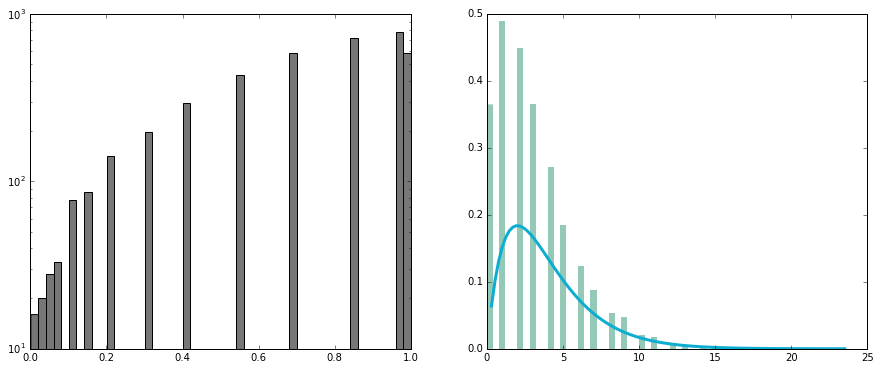

In [818]:
pylab.rcParams['figure.figsize'] = (15, 6)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.hist(pvals, 50, color='#777777')
ax.set_yscale("log", nonposy='clip')


ax = fig.add_subplot(1, 2, 2)
df = B_n - 1
r = np.linspace(st.chi2.ppf(0.01, df), st.chi2.ppf(0.9999, df), 100)
Ji = st.chi2.pdf(r, df=df)
ax.plot(r, Ji, color='#0DADD1', linewidth=3)
ax.hist(chisq, 50, normed=True, color='#94C9B7', edgecolor='none')

plt.show()